# Experiment results

This notebook computes some results for a given experiment. It does not aggregate over all experiments.

In [1]:
EXPERIMENT = 66

In [2]:
%cd ../..
%matplotlib inline

D:\Projects\Python\PL-Heuristic


In [3]:
import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

from analysis.caching import get_cached_results, has_cached_results, store_results
from analysis.measures import compute_measures

In [4]:
# Computing the measures for an entire experiment can be quite slow, so we normally
# work with cached data.
if has_cached_results(EXPERIMENT):
    results = get_cached_results(EXPERIMENT)
else:
    results = compute_measures(EXPERIMENT)
    store_results(EXPERIMENT, results)

# Analysis

In [5]:
# Sanity check
assert len(results) == 100

In [6]:
df = pd.DataFrame(results, index=np.arange(1, 101))
df.describe()

,heuristic_classroom_utilisation,heuristic_instruction_size,heuristic_objective,heuristic_percentage_instruction,heuristic_percentage_self_study,heuristic_self_study_size,heuristic_teacher_utilisation,ilp_classroom_utilisation,ilp_instruction_size,ilp_objective,ilp_percentage_instruction,ilp_percentage_self_study,ilp_self_study_size,ilp_teacher_utilisation
count,100.000000,100.000000,100.000000,100.00000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,93.204819,7.159224,3803.319596,38.92500,61.07500,14.410509,96.700000,84.024096,6.810370,3935.476497,45.970000,54.030000,27.551646,87.175000
std,1.217169,0.321964,82.031951,3.05443,3.05443,0.378283,1.262813,1.449227,0.312048,79.339320,2.106322,2.106322,1.303868,1.503573
min,89.156627,6.463415,3658.526025,33.12500,54.62500,13.611111,92.500000,80.722892,6.203704,3775.805703,41.875000,49.750000,20.142857,83.750000
25%,92.771084,6.924419,3736.308488,36.87500,59.06250,14.222385,96.250000,83.132530,6.592593,3877.841467,44.500000,52.500000,26.761029,86.250000
50%,93.975904,7.159091,3797.028015,39.12500,60.87500,14.299837,97.500000,84.337349,6.759259,3933.592646,45.625000,54.375000,27.500000,87.500000
75%,93.975904,7.418605,3859.152375,40.93750,63.12500,14.408221,97.500000,84.638554,7.037037,3991.057471,47.500000,55.500000,28.233333,87.812500
max,93.975904,7.804348,4009.227206,45.37500,66.87500,15.793103,97.500000,90.361446,7.444444,4118.758904,50.250000,58.125000,30.769231,93.750000


## Objective

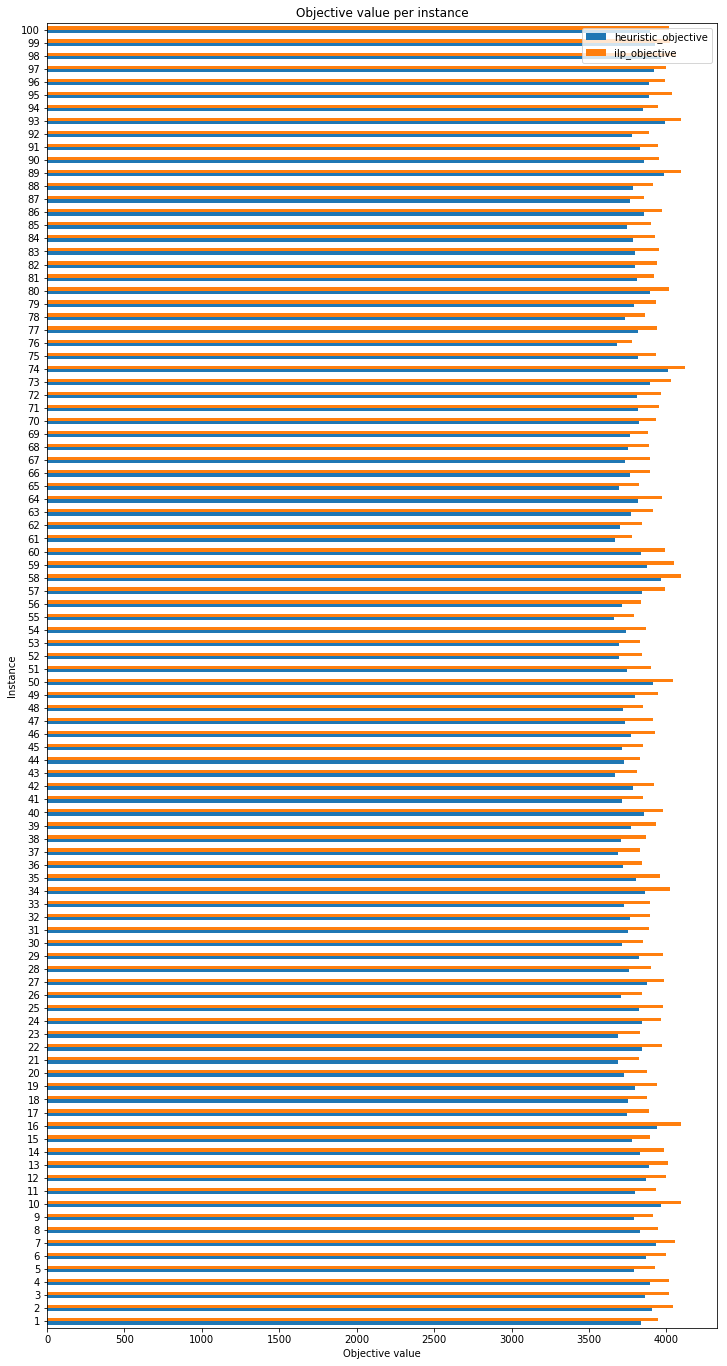

In [7]:
_, ax = plt.subplots(figsize=(12, 24))

ax.set_title("Objective value per instance")
ax.set_ylabel("Instance")
ax.set_xlabel("Objective value")

df[["heuristic_objective", "ilp_objective"]].plot.barh(ax=ax)

In [8]:
heuristic_objective = df['heuristic_objective'].mean()
ilp_objective = df['ilp_objective'].mean()

difference = 100 * (heuristic_objective - ilp_objective) / ilp_objective

print(f"Percentage difference between heuristic and optimal solution is {difference:.2f}%.")
print(f"The averages are {ilp_objective:.2f} (ilp), against {heuristic_objective:.2f} (heuristic).")

Percentage difference between heuristic and optimal solution is -3.36%.
The averages are 3935.48 (ilp), against 3803.32 (heuristic).


## Percentages instruction and self-study

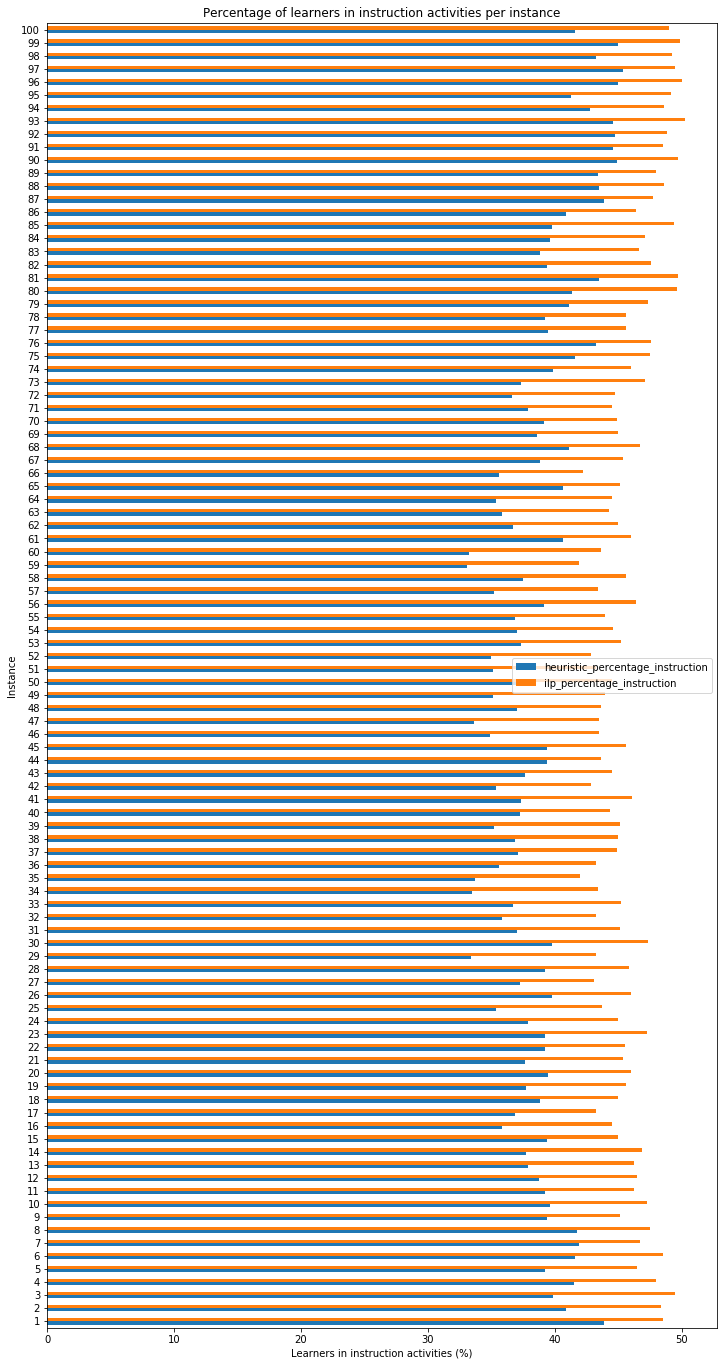

In [9]:
_, ax = plt.subplots(figsize=(12, 24))

ax.set_title("Percentage of learners in instruction activities per instance")
ax.set_ylabel("Instance")
ax.set_xlabel("Learners in instruction activities (%)")

df[["heuristic_percentage_instruction", "ilp_percentage_instruction"]].plot.barh(ax=ax)

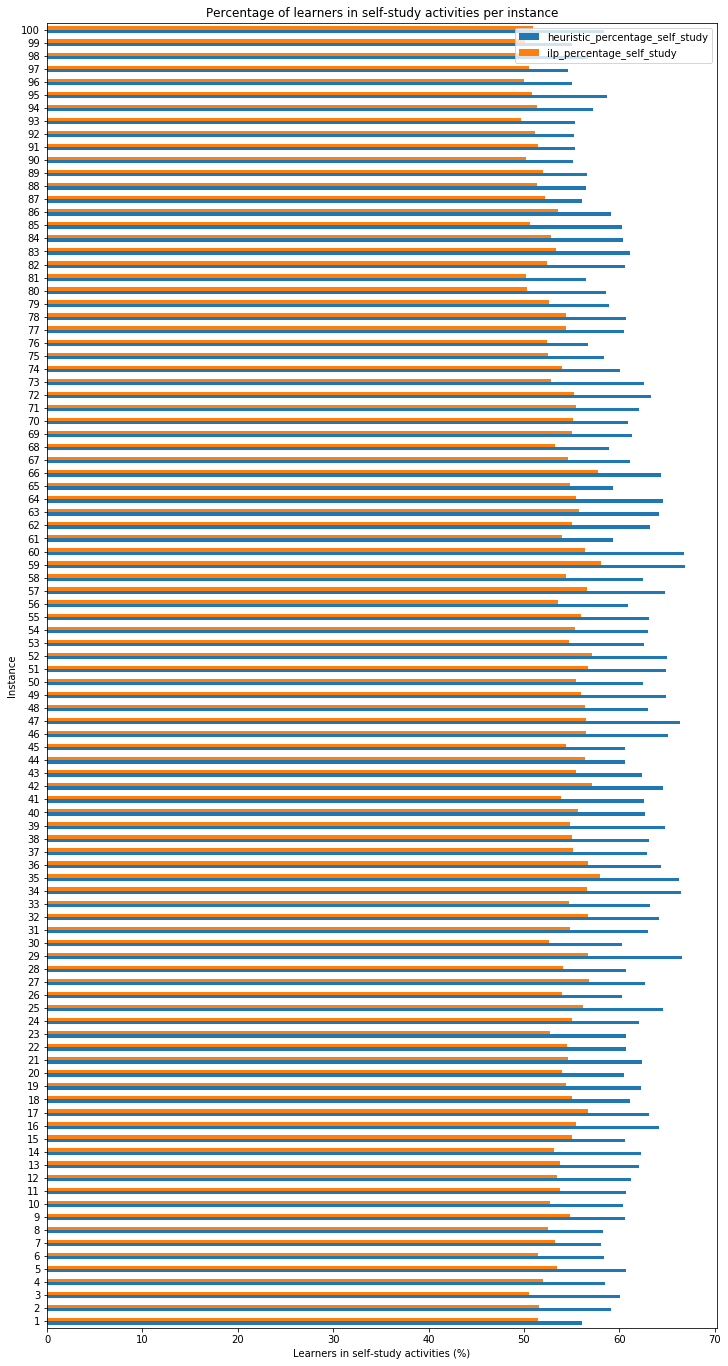

In [10]:
_, ax = plt.subplots(figsize=(12, 24))

ax.set_title("Percentage of learners in self-study activities per instance")
ax.set_ylabel("Instance")
ax.set_xlabel("Learners in self-study activities (%)")

df[["heuristic_percentage_self_study", "ilp_percentage_self_study"]].plot.barh(ax=ax)

In [11]:
heuristic_percentage_self_study = df['heuristic_percentage_self_study'].mean()
ilp_percentage_self_study = df['ilp_percentage_self_study'].mean()

difference = 100 * (heuristic_percentage_self_study - ilp_percentage_self_study) / ilp_percentage_self_study

print(f"On average, the heuristic solution has {difference:.2f}% more learners in self-study activities.")
print(f"The averages are {ilp_percentage_self_study:.2f}% (ilp), against {heuristic_percentage_self_study:.2f}% (heuristic).")

On average, the heuristic solution has 13.04% more learners in self-study activities.
The averages are 54.03% (ilp), against 61.08% (heuristic).


## Activity sizes

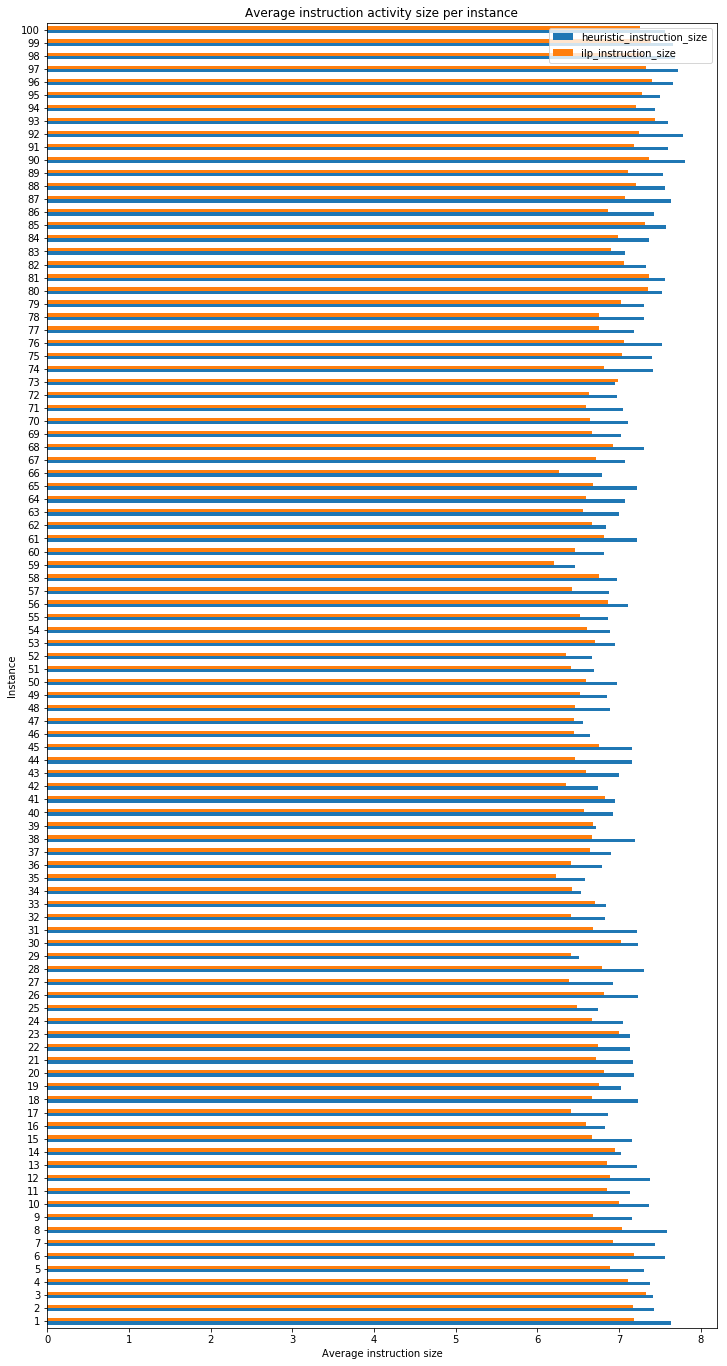

In [12]:
_, ax = plt.subplots(figsize=(12, 24))

ax.set_title("Average instruction activity size per instance")
ax.set_ylabel("Instance")
ax.set_xlabel("Average instruction size")

df[["heuristic_instruction_size", "ilp_instruction_size"]].plot.barh(ax=ax)

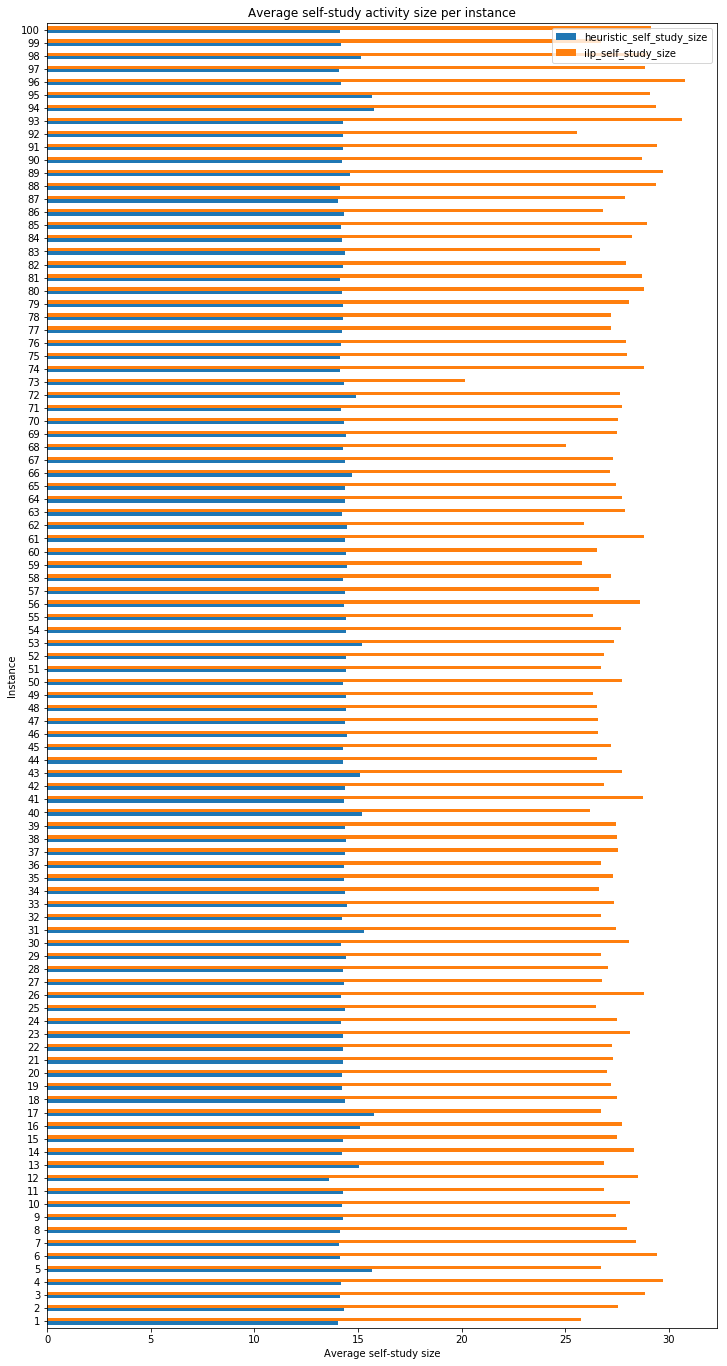

In [13]:
_, ax = plt.subplots(figsize=(12, 24))

ax.set_title("Average self-study activity size per instance")
ax.set_ylabel("Instance")
ax.set_xlabel("Average self-study size")

df[["heuristic_self_study_size", "ilp_self_study_size"]].plot.barh(ax=ax)

# Classroom and teacher pool utilisation

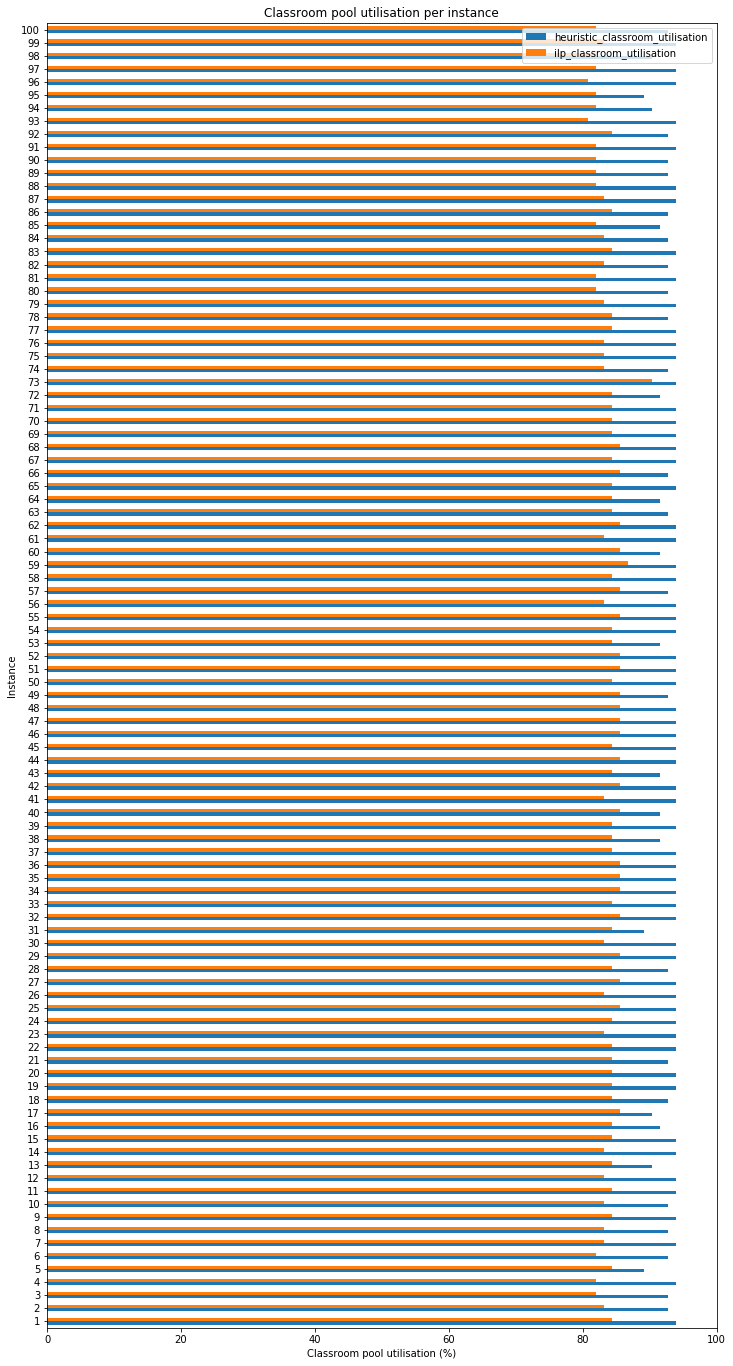

In [14]:
_, ax = plt.subplots(figsize=(12, 24))

ax.set_xlim(0, 100)
ax.set_title("Classroom pool utilisation per instance")
ax.set_ylabel("Instance")
ax.set_xlabel("Classroom pool utilisation (%)")

df[["heuristic_classroom_utilisation", "ilp_classroom_utilisation"]].plot.barh(ax=ax)

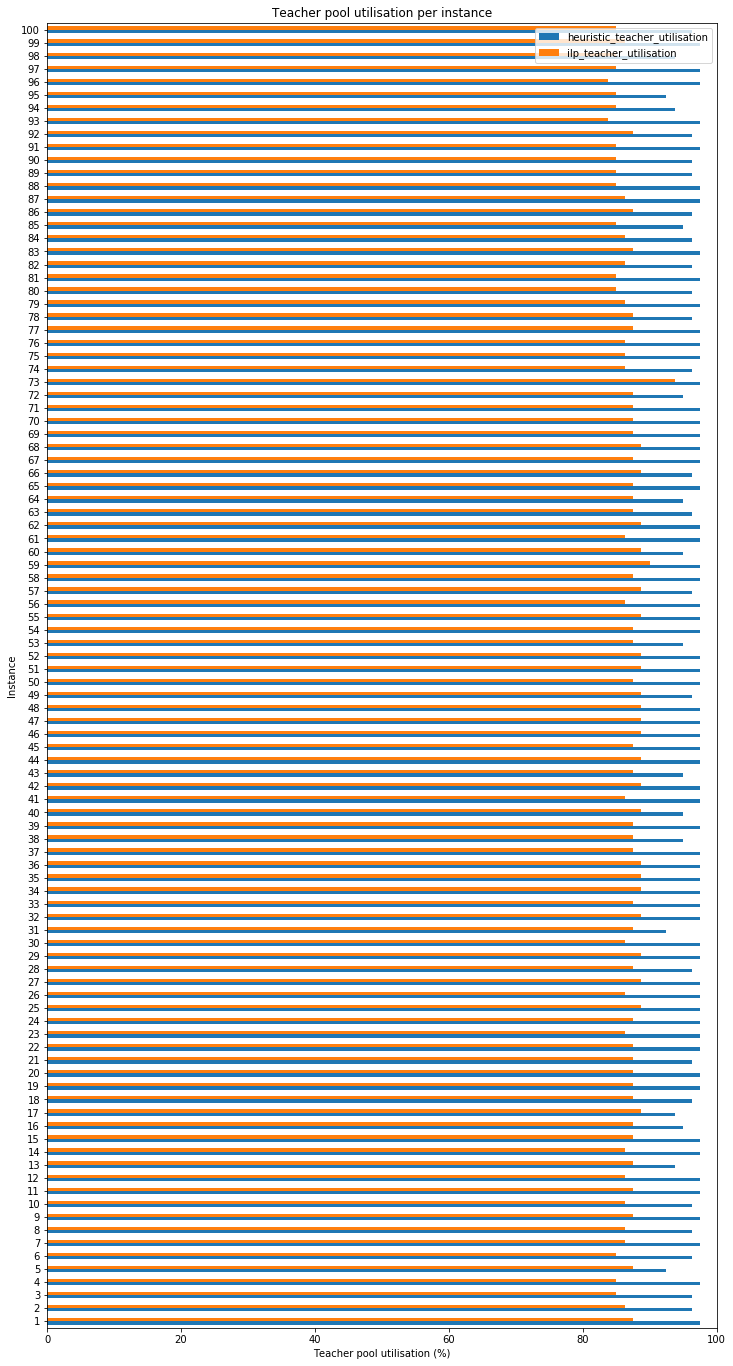

In [15]:
_, ax = plt.subplots(figsize=(12, 24))

ax.set_xlim(0, 100)
ax.set_title("Teacher pool utilisation per instance")
ax.set_ylabel("Instance")
ax.set_xlabel("Teacher pool utilisation (%)")

df[["heuristic_teacher_utilisation", "ilp_teacher_utilisation"]].plot.barh(ax=ax)